# Libraries Overview and Installation

### Introduction
This script uses several tools to process and analyze data, create visuals, and understand text. Below is a simplified explanation of what each library does and how to set it up.

---

1. **Pandas**  
   - **What it does**: Pandas helps organize and analyze data in tables, much like a spreadsheet. It makes working with large datasets easier and faster.It allows us to clean and explore data efficiently, such as finding patterns or missing information.  
   - **How to set it up**:  
     Open your terminal or command prompt and type:  
     ```bash
     pip install pandas
     ```

---

2. **Matplotlib**  
   - **What it does**: This library helps create charts and graphs, like bar charts or line graphs, to visualize data. It turns numbers into visuals, making the data easier to understand.  
   - **How to set it up**:  
     ```bash
     pip install matplotlib
     ```

---

3. **Plotly Express**  
   - **What it does**: Plotly Express helps make interactive charts that allow you to zoom, hover over points, and explore data more dynamically and it’s great for creating visuals that are both informative and interactive, perfect for presentations or dashboards.  
   - **How to set it up**:  
     ```bash
     pip install plotly
     ```

---

4. **NLTK (Natural Language Toolkit)**  
   - **What it does**: NLTK is a toolkit that helps analyze and understand text, like breaking down sentences into words, removing unnecessary words, and simplifying words to their root forms and it is essential for processing written information, like finding key phrases or cleaning up messy text.  
   - **How to set it up**:  
     ```bash
     pip install nltk
     ```
     After installation, you need to download some tools within NLTK:
     ```python
     import nltk
     nltk.download('punkt')  # For splitting text into words
     nltk.download('stopwords')  # For removing unimportant words
     nltk.download('wordnet')  # For simplifying words
     ```

---

5. **String**  
   - **What it does**: String is a built-in Python tool for handling text, such as removing punctuation or extra spaces. It is powerful tool for cleaning and preparing text for analysis.  
   - **How to set it up**: No setup is needed—it’s already included in Python.

---

6. **Scipy**  
   - **What it does**: Scipy is a library used for mathematical calculations, like finding trends in numbers or understanding how data is distributed and helps measure things like how "skewed" (off-center) data is, which tells us if something unusual is happening in the data.  
   - **How to set it up**:  
     ```bash
     pip install scipy
     ```

---

7. **SentenceTransformers**  
   - **What it does**: This is an advanced tool that compares the meaning of sentences. It helps find similarities between different pieces of text, even if the wording is different. Important for analyzing and understanding large amounts of text, such as comparing job descriptions or categorizing text data.  
   - **How to set it up**:  
     ```bash
     pip install sentence-transformers
     ```

---

These libraries work together to help process, analyze, and visualize data in ways that are easy to understand.


### Required Datasets for Re-running the Analysis

To successfully re-run the analysis and replicate the results, the following datasets are required:

1. **Education, Training, and Experience**: Contains data on the educational qualifications, training, and experience needed for various roles.
2. **IWA_Reference.xlsx**: Provides detailed information about Intermediate Work Activities (IWA), essential for classifying tasks and activities.
3. **Knowledge.xlsx**: Includes knowledge areas relevant to different jobs, crucial for assigning categories.
4. **Skills.xlsx**: Lists the skills required for various job roles, aiding in classification and analysis.
5. **Technology Skills.xlsx**: Covers technology-related skills and proficiencies, important for understanding technical roles.
6. **Work Context.xlsx**: Describes the context and environment in which work is performed, providing additional insights into job roles.
7. **Work_Activities.xlsx**: Contains data on work activities, which is critical for identifying and categorizing job responsibilities.

These datasets are essential for the preprocessing, analysis, and classification of job titles into categories like STEM or non-STEM. Ensure they are available to replicate the process accurately.


In [ ]:
# Import libraries for necessary data analysis
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import string
from scipy.stats import skew
from sentence_transformers import SentenceTransformer, util

In [ ]:
# load the Work_Activities.xlsx and IWA Reference files into their respective pandas DataFrames
work_activities = pd.read_excel('/content/Work_Activities.xlsx')

In [ ]:
work_activities.head(5)

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,4.A.1.a.1,Getting Information,IM,Importance,4.56,29.0,0.1559,4.2369,4.8756,N,NaN,08/2023,Incumbent
1,11-1011.00,Chief Executives,4.A.1.a.1,Getting Information,LV,Level,4.89,30.0,0.1727,4.5393,5.2458,N,N,08/2023,Incumbent
2,11-1011.00,Chief Executives,4.A.1.a.2,"Monitoring Processes, Materials, or Surroundings",IM,Importance,4.25,30.0,0.2125,3.8130,4.6823,N,NaN,08/2023,Incumbent
3,11-1011.00,Chief Executives,4.A.1.a.2,"Monitoring Processes, Materials, or Surroundings",LV,Level,5.21,30.0,0.3872,4.4133,5.9971,N,N,08/2023,Incumbent
4,11-1011.00,Chief Executives,4.A.1.b.1,"Identifying Objects, Actions, and Events",IM,Importance,4.23,29.0,0.1544,3.9180,4.5507,N,NaN,08/2023,Incumbent


In [ ]:
work_activities.tail(5)

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
72073,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.1,Performing Administrative Activities,LV,Level,2.27,27.0,0.3184,1.6108,2.9197,N,N,08/2019,Incumbent
72074,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.2,Staffing Organizational Units,IM,Importance,1.93,27.0,0.2132,1.4962,2.3726,N,NaN,08/2019,Incumbent
72075,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.2,Staffing Organizational Units,LV,Level,1.60,27.0,0.2965,0.9936,2.2125,N,N,08/2019,Incumbent
72076,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.3,Monitoring and Controlling Resources,IM,Importance,2.56,27.0,0.2582,2.0266,3.0881,N,NaN,08/2019,Incumbent
72077,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.3,Monitoring and Controlling Resources,LV,Level,2.64,27.0,0.3350,1.9556,3.3329,N,N,08/2019,Incumbent


In [ ]:
def perform_eda(pandas_df):
    """
    Perform basic exploratory data analysis, or EDA, on a pandas DataFrame.
    Prints the DataFrame's structure, summary statistics, missing values, and more.

    Parameters:
    pandas_df (pd.DataFrame): The pandas DataFrame to analyze.
    """
    print("=== DataFrame Shape ===")
    print(f"Rows: {pandas_df.shape[0]}, Columns: {pandas_df.shape[1]}")
    print()

    print("=== DataFrame Columns ===")
    print(pandas_df.columns)
    print()

    print("=== DataFrame Info ===")
    pandas_df.info()
    print()

    print("=== Missing Values ===")
    print(pandas_df.isnull().sum())
    print()

    print("=== Summary Statistics ===")
    print(pandas_df.describe(include='all'))
    print()

    print("=== Unique Values Per Column ===")
    print(pandas_df.nunique())
    print()


In [ ]:
# execute the perform_eda function on the work activities dataframe
perform_eda(work_activities)

=== DataFrame Shape ===
Rows: 72078, Columns: 15

=== DataFrame Columns ===
Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Data Value', 'N', 'Standard Error', 'Lower CI Bound',
       'Upper CI Bound', 'Recommend Suppress', 'Not Relevant', 'Date',
       'Domain Source'],
      dtype='object')

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72078 entries, 0 to 72077
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   O*NET-SOC Code      72078 non-null  object 
 1   Title               72078 non-null  object 
 2   Element ID          72078 non-null  object 
 3   Element Name        72078 non-null  object 
 4   Scale ID            72078 non-null  object 
 5   Scale Name          72078 non-null  object 
 6   Data Value          72078 non-null  float64
 7   N                   70356 non-null  float64
 8   Standard Error      54366 

In [ ]:
work_activities['Element Name'].unique()

array(['Getting Information',
       'Monitoring Processes, Materials, or Surroundings',
       'Identifying Objects, Actions, and Events',
       'Inspecting Equipment, Structures, or Materials',
       'Estimating the Quantifiable Characteristics of Products, Events, or Information',
       'Judging the Qualities of Objects, Services, or People',
       'Processing Information',
       'Evaluating Information to Determine Compliance with Standards',
       'Analyzing Data or Information',
       'Making Decisions and Solving Problems', 'Thinking Creatively',
       'Updating and Using Relevant Knowledge',
       'Developing Objectives and Strategies',
       'Scheduling Work and Activities',
       'Organizing, Planning, and Prioritizing Work',
       'Performing General Physical Activities',
       'Handling and Moving Objects',
       'Controlling Machines and Processes',
       'Operating Vehicles, Mechanized Devices, or Equipment',
       'Working with Computers',
       'Draftin

In [ ]:
# load the IWA dataset from an Excel file into a pandas DataFrame.
iwa = pd.read_excel('/content/IWA_Reference.xlsx')

# run exploratory data analysis to understand the dataset.
perform_eda(iwa)

=== DataFrame Shape ===
Rows: 332, Columns: 4

=== DataFrame Columns ===
Index(['Element ID', 'Element Name', 'IWA ID', 'IWA Title'], dtype='object')

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Element ID    332 non-null    object
 1   Element Name  332 non-null    object
 2   IWA ID        332 non-null    object
 3   IWA Title     332 non-null    object
dtypes: object(4)
memory usage: 10.5+ KB

=== Missing Values ===
Element ID      0
Element Name    0
IWA ID          0
IWA Title       0
dtype: int64

=== Summary Statistics ===
       Element ID                 Element Name         IWA ID  \
count         332                          332            332   
unique         37                           37            332   
top     4.A.3.a.2  Handling and Moving Objects  4.A.1.a.1.I01   
freq           47               

In [ ]:
# observe first 5 rows of the IWA dataframe
iwa.head(5)

,Element ID,Element Name,IWA ID,IWA Title
0,4.A.1.a.1,Getting Information,4.A.1.a.1.I01,Study details of artistic productions.
1,4.A.1.a.1,Getting Information,4.A.1.a.1.I02,Read documents or materials to inform work pro...
2,4.A.1.a.1,Getting Information,4.A.1.a.1.I03,Investigate criminal or legal matters.
3,4.A.1.a.1,Getting Information,4.A.1.a.1.I04,Gather information from physical or electronic...
4,4.A.1.a.1,Getting Information,4.A.1.a.1.I05,Consult legal materials or public records.


In [ ]:
# observe last 5 rows of the IWA dataframe
iwa.tail(5)

,Element ID,Element Name,IWA ID,IWA Title
327,4.A.4.c.3,Monitoring and Controlling Resources,4.A.4.c.3.I03,"Distribute materials, supplies, or resources."
328,4.A.4.c.3,Monitoring and Controlling Resources,4.A.4.c.3.I04,Collect fares or payments.
329,4.A.4.c.3,Monitoring and Controlling Resources,4.A.4.c.3.I05,Purchase goods or services.
330,4.A.4.c.3,Monitoring and Controlling Resources,4.A.4.c.3.I06,Prescribe medical treatments or devices.
331,4.A.4.c.3,Monitoring and Controlling Resources,4.A.4.c.3.I07,Monitor resources or inventories.


### Preprocessing Text Data for NLP

This code prepares the text descriptions of Intermediate Work Activities (IWA) for analysis by cleaning and simplifying the data. The process involves several steps to make the text suitable for use with advanced tools like BERT (a Natural Language Processing model).

1. **Lowercasing**: Converts all text to lowercase to ensure consistency (e.g., "Assess" and "assess" are treated the same).  
2. **Removing Punctuation**: Gets rid of unnecessary symbols (e.g., commas, periods) that don’t add meaning.  
3. **Tokenizing**: Breaks sentences into individual words, making it easier to analyze each word.  
4. **Removing Stop Words**: Filters out common words (e.g., "the," "and") that don’t carry significant meaning.  
5. **Lemmatizing**: Reduces words to their root form (e.g., "running" becomes "run"), simplifying the text while keeping its meaning intact.  
6. **Preserving Key Words**: Ensures important words like "assess" remain unchanged, even after processing.  
7. **Reconstructing Text**: Combines the processed words back into a single, clean string.  

Finally, the code applies this cleaning process to the "IWA Title" column in the dataset, creating a new column called "preprocessed_text" for use in further analysis.


In [ ]:
# download the punkt_tab tokenizer, which is required for splitting text into sentences or words
nltk.download('punkt_tab')

# download the punkt tokenizer, a model for breaking text into tokens (words or sentences)
nltk.download('punkt')

# download the stopwords dataset, which contains commonly used words (e.g., "the", "and") to filter out in text processing
nltk.download('stopwords')

# download the WordNet lexical database, which helps in finding the base form of words (lemmatization)
nltk.download('wordnet')

# download the Open Multilingual WordNet, which provides multilingual WordNet support
nltk.download('omw-1.4')



# preprocess the intermediate work activity description for BERT
def preprocess_data(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # lowercase the text
    text = text.lower()

    # remove unnecessary punctation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # tokenize the text
    tokens = word_tokenize(text)

    # remove stop words
    tokens = [word for word in tokens if word not in stop_words]


    # lemmatize the words in the phrase but preserve "assess" as is
    tokens = [word if word == "Assess" or "assess" else lemmatizer.lemmatize(word) for word in tokens]


    # combine tokens back into a single string
    return ' '.join(tokens)


iwa["preprocessed_text"] = iwa["IWA Title"].apply(preprocess_data)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
iwa.head()

,Element ID,Element Name,IWA ID,IWA Title,preprocessed_text
0,4.A.1.a.1,Getting Information,4.A.1.a.1.I01,Study details of artistic productions.,study details artistic productions
1,4.A.1.a.1,Getting Information,4.A.1.a.1.I02,Read documents or materials to inform work pro...,read documents materials inform work processes
2,4.A.1.a.1,Getting Information,4.A.1.a.1.I03,Investigate criminal or legal matters.,investigate criminal legal matters
3,4.A.1.a.1,Getting Information,4.A.1.a.1.I04,Gather information from physical or electronic...,gather information physical electronic sources
4,4.A.1.a.1,Getting Information,4.A.1.a.1.I05,Consult legal materials or public records.,consult legal materials public records


In [ ]:
# filter the dataset to show only rows where the 'Element Name' column has the value "Making Decisions and Solving Problems"
iwa[iwa['Element Name'] == "Making Decisions and Solving Problems"]

,Element ID,Element Name,IWA ID,IWA Title,preprocessed_text
84,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I01,Determine values or prices of goods or services.,determine values prices goods services
85,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I02,Diagnose system or equipment problems.,diagnose system equipment problems
86,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I03,Authorize business activities or transactions.,authorize business activities transactions
87,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I04,Determine operational methods or procedures.,determine operational methods procedures
88,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I05,Make legal decisions.,make legal decisions
89,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I06,Diagnose health conditions or disorders.,diagnose health conditions disorders
90,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I07,Edit written materials or documents.,edit written materials documents
91,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I08,Determine resource needs of projects or operat...,determine resource needs projects operations
92,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I09,Implement procedures or processes.,implement procedures processes
93,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I10,Select materials or equipment for operations o...,select materials equipment operations projects


In [ ]:
# filter the dataset to show only rows where the 'Element Name' is "Making Decisions and Solving Problems"
# this helps analyze work activities specifically related to decision-making and problem-solving tasks
iwa[iwa['Element Name'] == "Making Decisions and Solving Problems"]

,Element ID,Element Name,IWA ID,IWA Title,preprocessed_text
257,4.A.4.a.3,Communicating with People Outside the Organiza...,4.A.4.a.3.I01,Present information in legal proceedings.,present information legal proceedings
258,4.A.4.a.3,Communicating with People Outside the Organiza...,4.A.4.a.3.I02,Provide information or assistance to the public.,provide information assistance public
259,4.A.4.a.3,Communicating with People Outside the Organiza...,4.A.4.a.3.I03,"Provide information to guests, clients, or cus...",provide information guests clients customers


### Calculating BERT Scores for Analytical Tasks

This section uses a lightweight Sentence-BERT model to calculate similarity scores between preprocessed activity descriptions and analytical keywords. Here’s what each step does:

1. **Analytical Keywords**: A list of words and phrases related to analytical tasks is defined to help classify job activities.
2. **Sentence-BERT Model**: A pre-trained NLP model (`all-MiniLM-L6-v2`) is loaded to understand the meaning and context of text data.
3. **Generate Embeddings**:
   - **Activity Descriptions**: Converts the cleaned text data (`iwa['preprocessed_text']`) into numerical embeddings.  
   - **Keywords**: Converts analytical keywords into embeddings for comparison.
4. **Calculate Similarities**: Uses cosine similarity to measure how closely each activity description matches the analytical keywords.
5. **Assign BERT Scores**: The highest similarity score for each activity is assigned as its **BERT score** (`iwa['bert_scores']`). This helps quantify how "analytical" a task is based on its description.


In [ ]:
# this list contains keywords related to analytical tasks, used for identifying and classifying activities as analytical
analytical_keywords = ["analyze", "evaluate", "interpret", "research", "model", "forecast", "assess",
                       "data", "evidence", "conclude", "understand", "calculate", "investigate", "quantify",
                       "solve", "break down information", "dissect", "examine", "strategize", "measure", "derive",
                       "identify", "explain", "reasoning", "validate", "review", "statistical", "synthesize",
                       "verify", "test", "conceptualize", "optimize", "estimate", "debug", "generalize", "formulate",
                       "scrutinize", "analyze data", "evidence based reasoning", "draw conclusions",
                       "analyze information", "diagnose"]

# lightweight Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# generate embeddings
phrase_embedding = model.encode(list(iwa['preprocessed_text']))
keyword_embeddings = model.encode(analytical_keywords)

# calculate similarity scores
similarities = util.cos_sim(phrase_embedding, keyword_embeddings)

iwa['bert_scores'] = similarities.max(dim=1).values

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

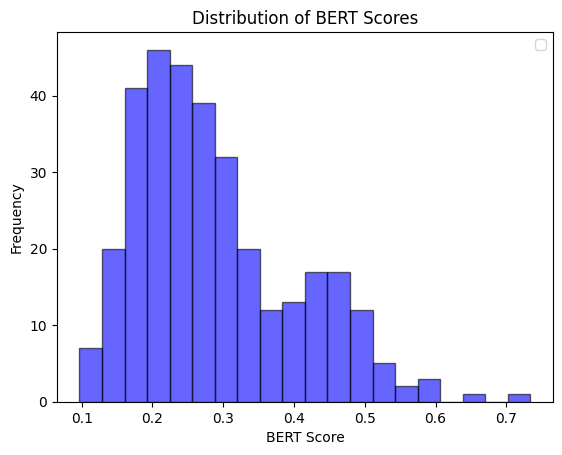

In [ ]:
# plot a histogram to show the distribution of BERT scores in the dataset.
plt.hist(iwa['bert_scores'], bins=20, alpha=0.6, color='blue', edgecolor='black')
plt.title('Distribution of BERT Scores')
plt.xlabel('BERT Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
iwa[iwa['Element Name'] == "Making Decisions and Solving Problems"]

,Element ID,Element Name,IWA ID,IWA Title,preprocessed_text,bert_scores
84,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I01,Determine values or prices of goods or services.,determine values prices goods services,0.294518
85,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I02,Diagnose system or equipment problems.,diagnose system equipment problems,0.460209
86,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I03,Authorize business activities or transactions.,authorize business activities transactions,0.131714
87,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I04,Determine operational methods or procedures.,determine operational methods procedures,0.314403
88,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I05,Make legal decisions.,make legal decisions,0.359622
89,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I06,Diagnose health conditions or disorders.,diagnose health conditions disorders,0.599021
90,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I07,Edit written materials or documents.,edit written materials documents,0.189688
91,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I08,Determine resource needs of projects or operat...,determine resource needs projects operations,0.245825
92,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I09,Implement procedures or processes.,implement procedures processes,0.267429
93,4.A.2.b.1,Making Decisions and Solving Problems,4.A.2.b.1.I10,Select materials or equipment for operations o...,select materials equipment operations projects,0.228404


In [ ]:
grouped_scores = iwa.groupby('Element Name')['bert_scores'].mean()

# sort the grouped scores in ascending order
sorted_scores = grouped_scores.sort_values(ascending=False)

# create new column that contains the mean similarity score for each work activity
iwa['mean_score'] = iwa.groupby('Element Name')['bert_scores'].transform('mean')

updated_iwa = grouped_scores.reset_index(name = 'mean_scores')

# print the sorted scores
print(sorted_scores)

Element Name
Analyzing Data or Information                                                      0.499382
Interpreting the Meaning of Information for Others                                 0.417454
Getting Information                                                                0.415525
Communicating with People Outside the Organization                                 0.398675
Estimating the Quantifiable Characteristics of Products, Events, or Information    0.389379
Processing Information                                                             0.382404
Inspecting Equipment, Structures, or Materials                                     0.380045
Judging the Qualities of Objects, Services, or People                              0.361104
Monitoring Processes, Materials, or Surroundings                                   0.356384
Working with Computers                                                             0.307685
Documenting/Recording Information                                  

In [ ]:
iwa[iwa["Element Name"] == "Coaching and Developing Others"]

,Element ID,Element Name,IWA ID,IWA Title,preprocessed_text,bert_scores,mean_score
304,4.A.4.b.5,Coaching and Developing Others,4.A.4.b.5.I01,Coach others.,coach others,0.381648,0.294536
305,4.A.4.b.5,Coaching and Developing Others,4.A.4.b.5.I02,Provide support or encouragement to others.,provide support encouragement others,0.207425,0.294536


In [ ]:
iwa[iwa["Element Name"] == "Updating and Using Relevant Knowledge"]

,Element ID,Element Name,IWA ID,IWA Title,preprocessed_text,bert_scores,mean_score
122,4.A.2.b.3,Updating and Using Relevant Knowledge,4.A.2.b.3.I01,Maintain current knowledge in area of expertise.,maintain current knowledge area expertise,0.258894,0.258894


We need to consider the work activity count is disportionate and the overall mean score might not be the best representation of the most analytical work activities. Activities with 2 intermediate work activities that have decent scores may lead to higher scores.

In [ ]:
grouped_count = iwa.groupby('Element Name').size().sort_values(ascending=False)

print(grouped_count)

Element Name
Handling and Moving Objects                                                        47
Thinking Creatively                                                                27
Getting Information                                                                23
Performing General Physical Activities                                             17
Documenting/Recording Information                                                  16
Guiding, Directing, and Motivating Subordinates                                    16
Communicating with Supervisors, Peers, or Subordinates                             13
Analyzing Data or Information                                                      12
Controlling Machines and Processes                                                 12
Assisting and Caring for Others                                                    12
Inspecting Equipment, Structures, or Materials                                     12
Providing Consultation and Advice to Othe

### Normalizing and Rescaling Scores with Threshold

This code processes activity scores to classify them as positive or negative based on a threshold. It normalizes and rescales the scores, assigns weights accordingly, and ensures meaningful distinctions between analytical and non-analytical activities.

1. **Normalization**:  
   - The `mean_scores` column is normalized to scale the values between 0 and 1.  
   - Formula: `(score - min_score) / (max_score - min_score)` ensures the scores are relative to the dataset range.

2. **Threshold Separation**:  
   - Activities are split into two groups:
     - **Above Threshold**: Activities with scores higher than the threshold are considered analytical.  
     - **Below Threshold**: Activities with scores lower than or equal to the threshold are considered less analytical.

3. **Weight Assignment**:  
   - **Above Threshold**: Positive weights are assigned proportionally based on the normalized scores.  
   - **Below Threshold**: Negative weights are assigned inversely to their normalized scores.

4. **Combining Subsets**:  
   - The subsets (above and below threshold) are merged back into the original DataFrame with a new column `weights` reflecting the calculated values.

5. **Summing Weights**:  
   - Calculates the total positive and negative weights separately to ensure correctness and balance:
     - `positive_weights_sum`: Sum of weights for activities above the threshold.  
     - `negative_weights_sum`: Sum of weights for activities below the threshold.  
   - Also verifies the total sum of all weights (`weights` column).

6. **Results Printed**:  
   - Outputs the sums of positive, negative, and total weights to validate the rescaling process.

This approach ensures activities are weighted correctly based on their analytical nature, enabling clear distinctions and fair scaling.


In [ ]:
# implement a threshold to remove activities that
def normalize_and_rescale(df, threshold):
    """
    Normalize and rescale mean_scores for activities above the threshold,
    and assign negative weights for activities below the threshold.
    """
    # normalize mean_scores
    df['normalized_scores'] = (df['mean_scores'] - df['mean_scores'].min()) / \
                               (df['mean_scores'].max() - df['mean_scores'].min())

    # separate activities above and below the threshold
    above_threshold = df[df['mean_scores'] > threshold].copy()
    below_threshold = df[df['mean_scores'] <= threshold].copy()

    # rescale weights for activities above the threshold
    above_threshold['weights'] = above_threshold['normalized_scores'] / above_threshold['normalized_scores'].sum()

    # assign negative weights for activities below the threshold (scaled inversely)
    below_threshold['weights'] = -below_threshold['normalized_scores'] / below_threshold['normalized_scores'].sum()

    # combine the two subsets back into the original DataFrame
    df['weights'] = 0
    df.loc[above_threshold.index, 'weights'] = above_threshold['weights']
    df.loc[below_threshold.index, 'weights'] = below_threshold['weights']

    return df


updated_iwa = normalize_and_rescale(updated_iwa, 0.29329524636268617)

# sum of positive weights (above threshold)
positive_weights_sum = updated_iwa[updated_iwa['weights'] > 0]['weights'].sum()

# sum of negative weights (below threshold)
negative_weights_sum = updated_iwa[updated_iwa['weights'] < 0]['weights'].sum()

# print the results
print("Sum of positive weights (above threshold):", positive_weights_sum)
print("Sum of negative weights (below threshold):", negative_weights_sum)
print("Total sum of weights:", updated_iwa['weights'].sum())


Sum of positive weights (above threshold): 1.0000000186264515
Sum of negative weights (below threshold): -0.9999999646097422
Total sum of weights: 5.4016709327697754e-08


<ipython-input-29-e293904d8e45>:23: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.12828854 0.04753971 0.08859059 0.04897702 0.08492613 0.09523257
 0.08124646 0.09599291 0.07378023 0.04860657 0.07191984 0.08217653
 0.05272293]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



Threshold at 0.25 is 0.239


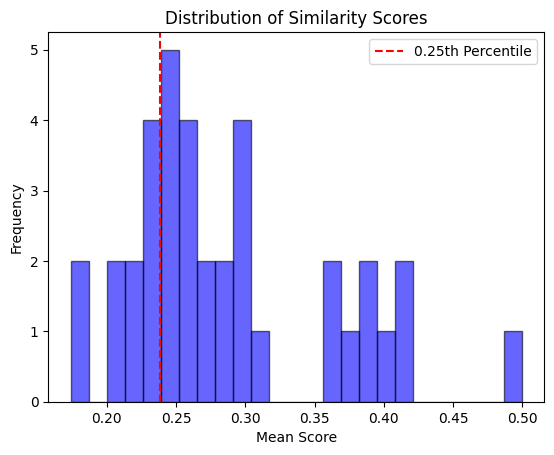

Threshold at 0.5 is 0.263


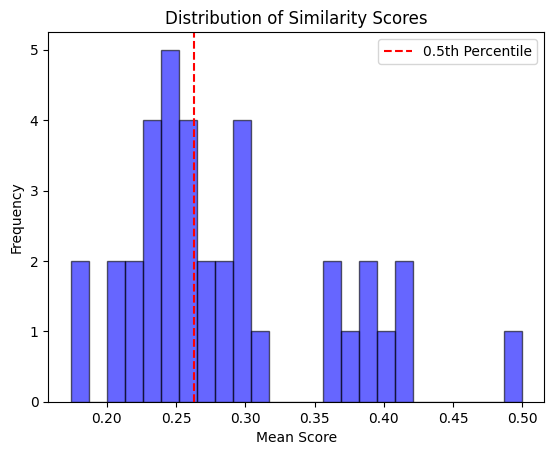

Threshold at 0.75 is 0.308


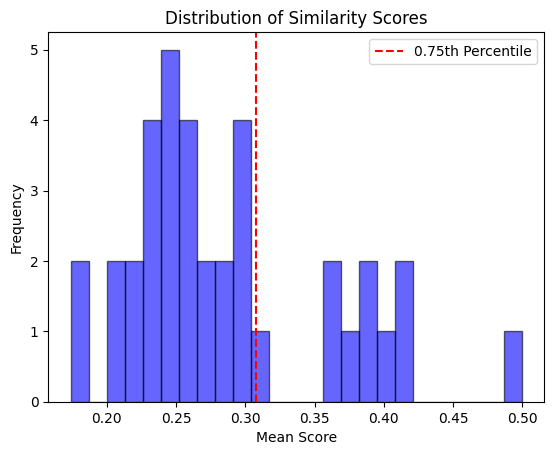

Threshold at 0.9 is 0.393


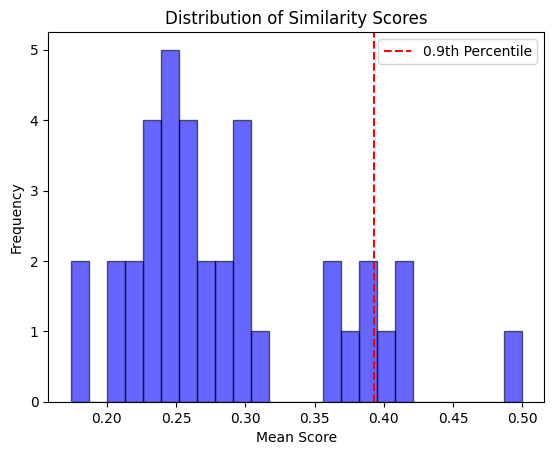

In [ ]:
# plot histogram of mean scores
qrt = [0.25, 0.5, 0.75, 0.9]

for i in qrt:
    print(f"Threshold at {i} is {round(updated_iwa['mean_scores'].quantile(i), 3)}")
    plt.hist(updated_iwa['mean_scores'], bins=25, alpha=0.6, color='blue', edgecolor='black')
    plt.title('Distribution of Similarity Scores')
    plt.xlabel('Mean Score')
    plt.ylabel('Frequency')
    plt.axvline(x=updated_iwa['mean_scores'].quantile(i), color='red', linestyle='dashed', label= f'{i}th Percentile')
    plt.legend()
    plt.show()

In [ ]:
thres = updated_iwa['mean_scores'].quantile(0.65)
print("Threshold at 65th Quantile: ", thres)
print(updated_iwa[updated_iwa['mean_scores'] >= thres])

Threshold at 65th Quantile:  0.29329527020454405
                                         Element Name  mean_scores  \
0                       Analyzing Data or Information     0.499382   
2                      Coaching and Developing Others     0.294536   
3   Communicating with People Outside the Organiza...     0.398675   
7                   Documenting/Recording Information     0.298182   
9   Estimating the Quantifiable Characteristics of...     0.389379   
11                                Getting Information     0.415525   
15     Inspecting Equipment, Structures, or Materials     0.380045   
16  Interpreting the Meaning of Information for Ot...     0.417454   
17  Judging the Qualities of Objects, Services, or...     0.361104   
18              Making Decisions and Solving Problems     0.297243   
19   Monitoring Processes, Materials, or Surroundings     0.356384   
26                             Processing Information     0.382404   
36                             Working wi

In [ ]:
updated_iwa

,Element Name,mean_scores,normalized_scores,weights
0,Analyzing Data or Information,0.499382,1.000000,0.128289
1,Assisting and Caring for Others,0.238586,0.198650,-0.039535
2,Coaching and Developing Others,0.294536,0.370569,0.047540
3,Communicating with People Outside the Organiza...,0.398675,0.690557,0.088591
4,"Communicating with Supervisors, Peers, or Subo...",0.288077,0.350722,-0.069801
5,Controlling Machines and Processes,0.177131,0.009818,-0.001954
6,Developing Objectives and Strategies,0.219427,0.139780,-0.027819
7,Documenting/Recording Information,0.298182,0.381772,0.048977
8,Establishing and Maintaining Interpersonal Rel...,0.242708,0.211315,-0.042056
9,Estimating the Quantifiable Characteristics of...,0.389379,0.661993,0.084926


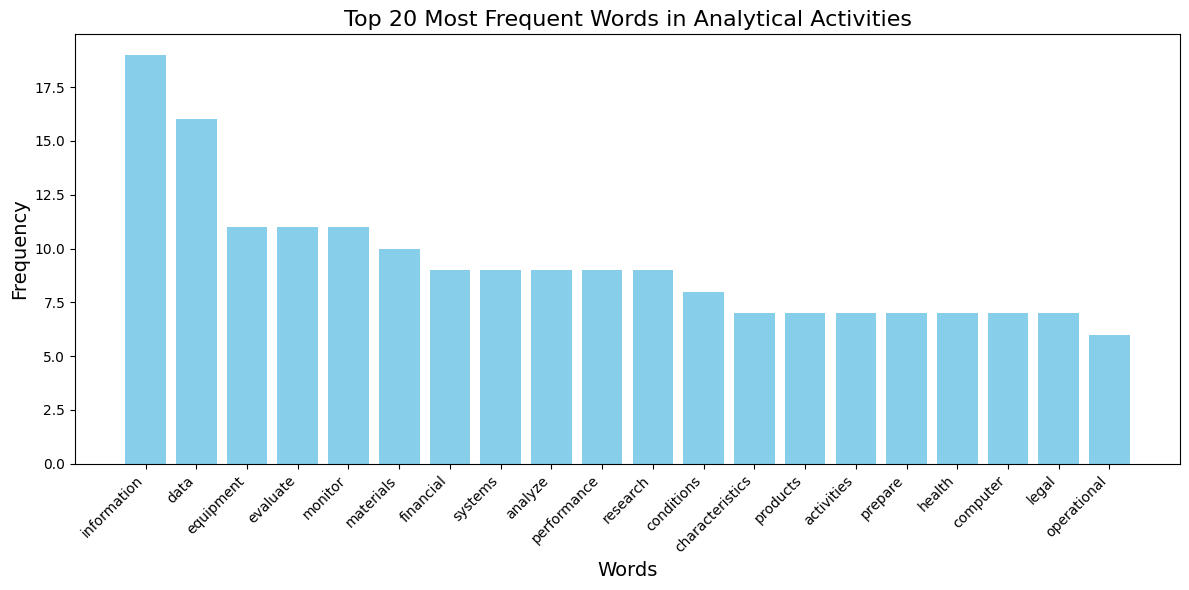

In [ ]:
from collections import Counter

temp_df = pd.merge(iwa, updated_iwa, on='Element Name')

# combine text data for analytical activities
analytical_text = " ".join(temp_df[temp_df['weights'] > 0]['preprocessed_text'])

# split text into words and count frequencies
words = analytical_text.split()
word_counts = Counter(words)

# convert word counts to a DataFrame for easy plotting
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# plot the top 20 most frequent words
plt.figure(figsize=(12, 6))
plt.bar(word_counts_df['Word'][:20], word_counts_df['Frequency'][:20], color='skyblue')
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Top 20 Most Frequent Words in Analytical Activities", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


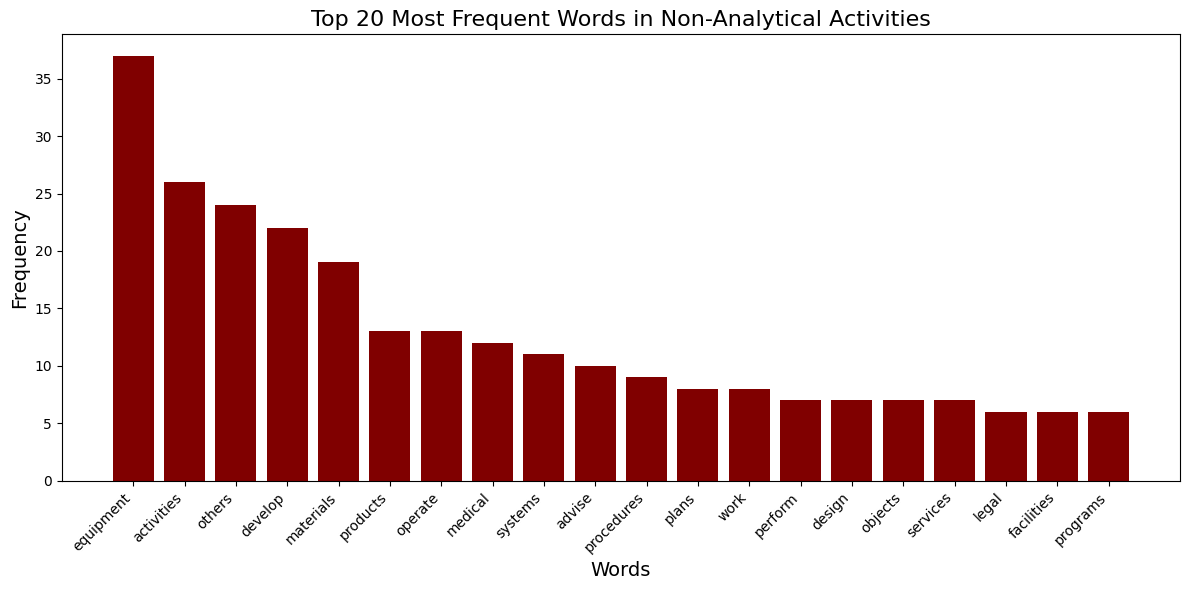

In [ ]:
# combine text data for non analytical activities
analytical_text = " ".join(temp_df[temp_df['weights'] < 0]['preprocessed_text'])

# split text into words and count frequencies
words = analytical_text.split()
word_counts = Counter(words)

# convert word counts to a DataFrame for easy plotting
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# plot the top 20 most frequent words for non analytical activities
plt.figure(figsize=(12, 6))
plt.bar(word_counts_df['Word'][:20], word_counts_df['Frequency'][:20], color='maroon')
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Top 20 Most Frequent Words in Non-Analytical Activities", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Back to work activites to classify job titles based on the weighted work activities

In [ ]:
perform_eda(work_activities)

=== DataFrame Shape ===
Rows: 72078, Columns: 15

=== DataFrame Columns ===
Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Data Value', 'N', 'Standard Error', 'Lower CI Bound',
       'Upper CI Bound', 'Recommend Suppress', 'Not Relevant', 'Date',
       'Domain Source'],
      dtype='object')

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72078 entries, 0 to 72077
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   O*NET-SOC Code      72078 non-null  object 
 1   Title               72078 non-null  object 
 2   Element ID          72078 non-null  object 
 3   Element Name        72078 non-null  object 
 4   Scale ID            72078 non-null  object 
 5   Scale Name          72078 non-null  object 
 6   Data Value          72078 non-null  float64
 7   N                   70356 non-null  float64
 8   Standard Error      54366 

I noticed that there were 4 workactivities that weren't included in the iwa dataset. Based on the results, I don't feel like the activites that were not listed would drastically affect given weights of the 37 work activities.

In [ ]:
list2 = list(work_activities["Element Name"].unique())
list1 = list(updated_iwa["Element Name"].unique())

# Values in list2 but not in list1
not_in_list1 = set(list2) - set(list1)
print("Values in list2 but not in list1:", not_in_list1)

Values in list2 but not in list1: {'Drafting, Laying Out, and Specifying Technical Devices, Parts, and Equipment', 'Developing and Building Teams', 'Repairing and Maintaining Electronic Equipment', 'Coordinating the Work and Activities of Others'}


In [ ]:
# join work activies and the updated iwa df on the Element names
res = pd.merge(work_activities, updated_iwa, on='Element Name')

In [ ]:
perform_eda(res)

=== DataFrame Shape ===
Rows: 65046, Columns: 18

=== DataFrame Columns ===
Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Data Value', 'N', 'Standard Error', 'Lower CI Bound',
       'Upper CI Bound', 'Recommend Suppress', 'Not Relevant', 'Date',
       'Domain Source', 'mean_scores', 'normalized_scores', 'weights'],
      dtype='object')

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65046 entries, 0 to 65045
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   O*NET-SOC Code      65046 non-null  object 
 1   Title               65046 non-null  object 
 2   Element ID          65046 non-null  object 
 3   Element Name        65046 non-null  object 
 4   Scale ID            65046 non-null  object 
 5   Scale Name          65046 non-null  object 
 6   Data Value          65046 non-null  float64
 7   N                   63492 no

In [ ]:
res

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,mean_scores,normalized_scores,weights
0,11-1011.00,Chief Executives,4.A.1.a.1,Getting Information,IM,Importance,4.56,29.0,0.1559,4.2369,4.8756,N,NaN,08/2023,Incumbent,0.415525,0.742331,0.095233
1,11-1011.00,Chief Executives,4.A.1.a.1,Getting Information,LV,Level,4.89,30.0,0.1727,4.5393,5.2458,N,N,08/2023,Incumbent,0.415525,0.742331,0.095233
2,11-1011.00,Chief Executives,4.A.1.a.2,"Monitoring Processes, Materials, or Surroundings",IM,Importance,4.25,30.0,0.2125,3.8130,4.6823,N,NaN,08/2023,Incumbent,0.356384,0.560610,0.071920
3,11-1011.00,Chief Executives,4.A.1.a.2,"Monitoring Processes, Materials, or Surroundings",LV,Level,5.21,30.0,0.3872,4.4133,5.9971,N,N,08/2023,Incumbent,0.356384,0.560610,0.071920
4,11-1011.00,Chief Executives,4.A.1.b.1,"Identifying Objects, Actions, and Events",IM,Importance,4.23,29.0,0.1544,3.9180,4.5507,N,NaN,08/2023,Incumbent,0.288532,0.352120,-0.070079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65041,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.1,Performing Administrative Activities,LV,Level,2.27,27.0,0.3184,1.6108,2.9197,N,N,08/2019,Incumbent,0.257354,0.256318,-0.051012
65042,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.2,Staffing Organizational Units,IM,Importance,1.93,27.0,0.2132,1.4962,2.3726,N,NaN,08/2019,Incumbent,0.240245,0.203746,-0.040550
65043,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.2,Staffing Organizational Units,LV,Level,1.60,27.0,0.2965,0.9936,2.2125,N,N,08/2019,Incumbent,0.240245,0.203746,-0.040550
65044,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.A.4.c.3,Monitoring and Controlling Resources,IM,Importance,2.56,27.0,0.2582,2.0266,3.0881,N,NaN,08/2019,Incumbent,0.251750,0.239099,-0.047585


### Data Cleaning
We need to remove rows that indicate low precision. For any analysis it is important that the quality of the data is good. Since the column "Data Value" is a metric that is used for our analytical index, we need to know if the value is good enough quality to ultize for our calculation of the index. It is especially important to ensure that the data values are reliable because if the analysis is used in practice or policy by the STEM organization then there are

In [ ]:
# filter out rows based on "Scale Name", "Recommend Suppress", and "Not Relevant"

# count and remove rows where "Scale Name" is "Level"
print("Number of rows with Level as Scale Name:", len(res[res["Scale Name"] == "Level"]))
res = res[res["Scale Name"] != "Level"]

# fount and remove rows where "Recommend Suppress" is "Y"
print("Number of rows with Recommend Suppress as 'Y':", len(res[res["Recommend Suppress"] == "Y"]))
res = res[res["Recommend Suppress"] != "Y"]

# count and remove rows where "Not Relevant" is "Y"
print("Number of rows with Not Relevant as 'Y':", len(res[res["Not Relevant"] == "Y"]))
res = res[res["Not Relevant"] != "Y"]

# final DataFrame shape and null value summary
print("Final DataFrame shape:", res.shape)
print("Null values in each column:\n", res.isnull().sum())

Number of rows with Level as Scale Name: 32523
Number of rows with Recommend Suppress as 'Y': 1
Number of rows with Not Relevant as 'Y': 0
Final DataFrame shape: (32522, 18)
Null values in each column:
 O*NET-SOC Code            0
Title                     0
Element ID                0
Element Name              0
Scale ID                  0
Scale Name                0
Data Value                0
N                       777
Standard Error         7992
Lower CI Bound         7999
Upper CI Bound         7999
Recommend Suppress     7289
Not Relevant          32522
Date                      0
Domain Source             0
mean_scores               0
normalized_scores         0
weights                   0
dtype: int64


We need to determine if the number of responses for each job and each work activity is skewed or not to know if possible to impute the missing values.

- Some questions arise. How can we determine the threshold for a valid number of responses for each job title? Is a certain number of responses too low? We don't know enough about the job to make an assumption that the number of responses is too low. It could be a highly specialized field that does not have enough people in the field? We can assume that each response is made by experts so its fair to keep each row even the ones with low N values

In [ ]:
missing_percentage = res.groupby('Title')['Standard Error'].apply(lambda x: x.isna().mean() * 100)
print(missing_percentage[missing_percentage != 0])
print(missing_percentage.unique())

se_skew = res['Standard Error'].apply(skew)
print(se_skew)

Title
Accountants and Auditors                     100.0
Actuaries                                    100.0
Acute Care Nurses                            100.0
Adapted Physical Education Specialists       100.0
Advanced Practice Psychiatric Nurses         100.0
                                             ...  
Water Resource Specialists                   100.0
Water/Wastewater Engineers                   100.0
Weatherization Installers and Technicians    100.0
Web Administrators                           100.0
Web Developers                               100.0
Name: Standard Error, Length: 216, dtype: float64
[100.   0.]
0       NaN
2       NaN
4       NaN
6       NaN
8       NaN
         ..
65036   NaN
65038   NaN
65040   NaN
65042   NaN
65044   NaN
Name: Standard Error, Length: 32522, dtype: float64


In [ ]:
temp_res = res[res["Standard Error"].isna() == True]

n_grouped = temp_res.groupby(['Title'])['Standard Error']

n_skewed_results = n_grouped.apply(skew)

print(len(n_skewed_results))

216


In [ ]:
q1 = res["Standard Error"].quantile(0.25)
q3 = res["Standard Error"].quantile(0.75)
iqr = q3 - q1

# Define the upper threshold
upper_threshold = q3 + 1.5 * iqr

# Print the threshold
print(f"Upper Threshold for Standard Error: {upper_threshold}")

Upper Threshold for Standard Error: 0.58295


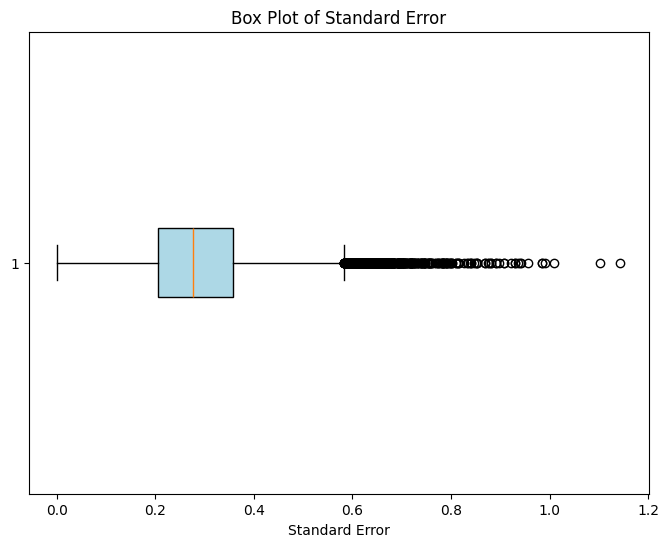

24530
0.02898491642886262
      O*NET-SOC Code                          Title Element ID  \
74        11-1011.03  Chief Sustainability Officers  4.A.1.a.1   
76        11-1011.03  Chief Sustainability Officers  4.A.1.a.2   
78        11-1011.03  Chief Sustainability Officers  4.A.1.b.1   
80        11-1011.03  Chief Sustainability Officers  4.A.1.b.2   
82        11-1011.03  Chief Sustainability Officers  4.A.1.b.3   
...              ...                            ...        ...   
63334     53-6011.00        Bridge and Lock Tenders  4.A.4.b.5   
63336     53-6011.00        Bridge and Lock Tenders  4.A.4.b.6   
63338     53-6011.00        Bridge and Lock Tenders  4.A.4.c.1   
63340     53-6011.00        Bridge and Lock Tenders  4.A.4.c.2   
63342     53-6011.00        Bridge and Lock Tenders  4.A.4.c.3   

                                            Element Name Scale ID  Scale Name  \
74                                   Getting Information       IM  Importance   
76      Monitoring 

In [ ]:
# Drop missing values to ensure the box plot works properly
standard_error_data = res['Standard Error'].dropna()

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(standard_error_data, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Box Plot of Standard Error')
plt.xlabel('Standard Error')
plt.show()

print(len(standard_error_data))
print(len(standard_error_data[standard_error_data >= 0.562]) / len(standard_error_data))

print((res[(res["Standard Error"].isna() == True) & (res["Recommend Suppress"].isna() == True)]))

In [ ]:
# remove rows where Standard Error > 0.55 and Recommend Suppress == "N"
res = res[~((res["Standard Error"] > 0.562) & (res["Recommend Suppress"] == "N"))]

In [ ]:
print(len(res[(res["Standard Error"].isna()) & (res["Lower CI Bound"].isna()) & (res["Upper CI Bound"].isna())]))

7992


In [ ]:
filtered_res = res[(~res["Standard Error"].isna()) &
                   (res["Lower CI Bound"].isna()) &
                   (res["Upper CI Bound"].isna())]
filtered_res

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,mean_scores,normalized_scores,weights
854,11-3031.03,Investment Fund Managers,4.A.3.b.4,Repairing and Maintaining Mechanical Equipment,IM,Importance,1.0,27.0,0.0,NaN,NaN,N,NaN,07/2014,Incumbent,0.173936,0.000000,-0.000000
17652,21-1012.00,"Educational, Guidance, and Career Counselors a...",4.A.3.b.4,Repairing and Maintaining Mechanical Equipment,IM,Importance,1.0,24.0,0.0,NaN,NaN,N,NaN,08/2024,Incumbent,0.173936,0.000000,-0.000000
17948,21-1021.00,"Child, Family, and School Social Workers",4.A.3.b.4,Repairing and Maintaining Mechanical Equipment,IM,Importance,1.0,20.0,0.0,NaN,NaN,N,NaN,08/2018,Incumbent,0.173936,0.000000,-0.000000
20464,25-1067.00,"Sociology Teachers, Postsecondary",4.A.3.b.4,Repairing and Maintaining Mechanical Equipment,IM,Importance,1.0,36.0,0.0,NaN,NaN,N,NaN,08/2019,Incumbent,0.173936,0.000000,-0.000000
44436,43-9081.00,Proofreaders and Copy Markers,4.A.3.a.4,"Operating Vehicles, Mechanized Devices, or Equ...",IM,Importance,1.0,16.0,0.0,NaN,NaN,N,NaN,07/2016,Incumbent,0.200494,0.081604,-0.016241
44440,43-9081.00,Proofreaders and Copy Markers,4.A.3.b.4,Repairing and Maintaining Mechanical Equipment,IM,Importance,1.0,16.0,0.0,NaN,NaN,N,NaN,07/2016,Incumbent,0.173936,0.000000,-0.000000
56150,51-4111.00,Tool and Die Makers,4.A.4.a.8,Performing for or Working Directly with the Pu...,IM,Importance,1.0,19.0,0.0,NaN,NaN,N,NaN,08/2021,Incumbent,0.262920,0.273420,-0.054416


In [ ]:
filtered_data = res[(res["Recommend Suppress"] == 'N') & (res["Standard Error"].isna())]
len(filtered_data["Title"].unique())

19

In [ ]:
# Calculate the weighted importance for each row
res['Weighted Importance'] = res['weights'] * res['Data Value']

# Group by job title and sum the weighted importance to get the Analytical Index score
analytical_index = res.groupby('Title')['Weighted Importance'].sum().reset_index()

analytical_index.sort_values(by='Weighted Importance', ascending=False)

,Title,Weighted Importance
94,Brokerage Clerks,1.182150
14,Aerospace Engineers,1.104998
626,Petroleum Engineers,1.098982
234,"Drilling and Boring Machine Tool Setters, Oper...",1.049042
662,Power Distributors and Dispatchers,1.020128
...,...,...
480,Logging Equipment Operators,-0.882667
72,Bicycle Repairers,-0.887243
459,"Lathe and Turning Machine Tool Setters, Operat...",-0.896898
1,Actors,-0.905021


In [ ]:
analytical_index.describe()

,Weighted Importance
count,879.000000
mean,0.261128
std,0.320038
min,-1.716221
25%,0.072786
50%,0.267230
75%,0.475505
max,1.182150


In [ ]:
# calculate 75th percentile
threshold = analytical_index['Weighted Importance'].quantile(0.80)
print(f"Threshold for Analytical Jobs: {threshold}")

# classify jobs
analytical_index['Is Analytical'] = analytical_index['Weighted Importance'] >= threshold


Threshold for Analytical Jobs: 0.5254092703945937


In [ ]:
print(len(analytical_index[analytical_index['Is Analytical'] == True]["Title"].unique()))
analytical_index[analytical_index['Is Analytical'] == True]["Title"].unique()

176


array(['Actuaries',
       'Aerospace Engineering and Operations Technologists and Technicians',
       'Aerospace Engineers', 'Agricultural Engineers',
       'Air Traffic Controllers',
       'Airline Pilots, Copilots, and Flight Engineers',
       'Animal Scientists', 'Anthropologists and Archeologists',
       'Appraisers and Assessors of Real Estate',
       'Arbitrators, Mediators, and Conciliators', 'Astronomers',
       'Atmospheric and Space Scientists',
       'Audiovisual Equipment Installers and Repairers',
       'Automotive Engineers', 'Biochemists and Biophysicists',
       'Bioengineers and Biomedical Engineers',
       'Biofuels Processing Technicians',
       'Biofuels/Biodiesel Technology and Product Development Managers',
       'Bioinformatics Scientists', 'Bioinformatics Technicians',
       'Biological Science Teachers, Postsecondary',
       'Biological Technicians', 'Biologists', 'Brokerage Clerks',
       'Business Intelligence Analysts', 'Cargo and Freight Ag

In [ ]:
# croup the data by Title and calculate metrics
temp_df = pd.merge(final_results, res, on="Title")
grouped_data = temp_df.groupby("Title").agg(
    Avg_Standard_Error=("Standard Error", "mean"),
    Analytical_Index=("Weighted Importance_x", "mean"),
    Num_Activities=("Element Name", "count")
).reset_index()

#  bubble chart
fig = px.scatter(
    grouped_data,
    x="Avg_Standard_Error",
    y="Analytical_Index",
    size="Num_Activities",  # Bubble size
    color="Title",  # Different color for each title
    hover_name="Title",  # Tooltip with job titles
    title='Bubble Chart: Standard Error vs Analytical Index by Job',
    labels={'Avg_Standard_Error': 'Average Standard Error', 'Analytical_Index': 'Analytical Index'},
    template='plotly_white'
)

# customize layout
fig.update_layout(
    xaxis_title='Average Standard Error',
    yaxis_title='Analytical Index Score',
    showlegend=True,
    height=600,
    width=1300
)

# show plot
fig.show()



In [ ]:
doesnt_make_sense = ['Brokerage Clerks', 'Patternmakers, Wood',
       'Personal Care Aides','Drilling and Boring Machine Tool Setters, Operators, and Tenders, Metal and Plastic',]

## Data Validation

In [ ]:
# job titles with the word "Analyst"
analysts = res[res['Title'].str.contains('analyst', case=False, na=False)]["Title"].unique()


# ChatGPT's Top 20 analytical jobs based on my defintion of "analytical"
analytical_jobs = [
    "Operations Research Analysts",
    "Economists",
    "Statisticians",
    "Actuaries",
    "Market Research Analysts and Marketing Specialists",
    "Financial Quantitative Analysts",
    "Business Intelligence Analysts",
    "Computer Systems Analysts",
    "Aerospace Engineers",
    "Bioinformatics Scientists",
    "Mathematicians",
    "Medical Scientists, Except Epidemiologists",
    "Climate Change Policy Analysts",
    "Environmental Scientists and Specialists, Including Health",
    "Computer and Information Research Scientists",
    "Industrial-Organizational Psychologists",
    "Logistics Analysts",
    "Electrical Engineers",
    "Chemists",
    "Geographers"
]


In [ ]:
# separate analytical and non-analytical jobs
yes = [job for job in analytical_jobs if job in analytical_index[analytical_index['Is Analytical'] == True]["Title"].unique()]
no = [job for job in analytical_jobs if job not in analytical_index[analytical_index['Is Analytical'] == True]["Title"].unique()]

# print results
print("Analyst jobs that are analytical:")
print(yes)
print("\n")
print("Analyst jobs that aren't analytical:")
print(no)
print("\n")
# calculate and print the percentage of jobs classified as analytical
percentage_analytical = len(yes) / (len(yes) + len(no))
print(f"Percentage of analytical jobs: {percentage_analytical:.2%}")

Analyst jobs that are analytical:
['Operations Research Analysts', 'Economists', 'Statisticians', 'Actuaries', 'Market Research Analysts and Marketing Specialists', 'Financial Quantitative Analysts', 'Business Intelligence Analysts', 'Computer Systems Analysts', 'Aerospace Engineers', 'Bioinformatics Scientists', 'Mathematicians', 'Climate Change Policy Analysts', 'Environmental Scientists and Specialists, Including Health', 'Logistics Analysts', 'Electrical Engineers', 'Chemists', 'Geographers']


Analyst jobs that aren't analytical:
['Medical Scientists, Except Epidemiologists', 'Computer and Information Research Scientists', 'Industrial-Organizational Psychologists']


Percentage of analytical jobs: 85.00%


In [ ]:
# separate analytical and non-analytical jobs
y1 = [job for job in analysts if job in analytical_index[analytical_index['Is Analytical'] == True]["Title"].unique()]
n1 = [job for job in analysts if job not in analytical_index[analytical_index['Is Analytical'] == True]["Title"].unique()]

# print results
print("ChatGPT's analytical jobs that are analytical:")
print(y1)
print("\n")
print("ChatGPT's analytical jobs that aren't analytical:")
print(n1)
print("\n")
# calculate and print the percentage of jobs classified as analytical
percentage_analytical = len(y1) / (len(y1) + len(n1))
print(f"Percentage of analytical jobs: {percentage_analytical:.2%}")

ChatGPT's analytical jobs that are analytical:
['Logistics Analysts', 'Market Research Analysts and Marketing Specialists', 'Credit Analysts', 'Financial Quantitative Analysts', 'Computer Systems Analysts', 'Information Security Analysts', 'Software Quality Assurance Analysts and Testers', 'Operations Research Analysts', 'Business Intelligence Analysts', 'Climate Change Policy Analysts', 'Quality Control Analysts', 'News Analysts, Reporters, and Journalists', 'Intelligence Analysts']


ChatGPT's analytical jobs that aren't analytical:
['Management Analysts', 'Budget Analysts', 'Fraud Examiners, Investigators and Analysts']


Percentage of analytical jobs: 81.25%


In [ ]:
final_results = analytical_index[analytical_index['Is Analytical'] == True]
final_results

,Title,Weighted Importance,Is Analytical
2,Actuaries,0.759839,True
13,Aerospace Engineering and Operations Technolog...,0.852103,True
14,Aerospace Engineers,1.104998,True
16,Agricultural Engineers,0.698147,True
21,Air Traffic Controllers,0.575563,True
...,...,...,...
853,Validation Engineers,0.935362,True
859,Watch and Clock Repairers,0.534287,True
860,Water Resource Specialists,0.560759,True
862,Water/Wastewater Engineers,0.535496,True


In [ ]:
# load the knowledge.xlsx file into a pandas DataFrame named 'tasks'
knowledge = pd.read_excel('/content/Knowledge.xlsx')

In [ ]:
knowledge.head(5)

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,2.C.1.a,Administration and Management,IM,Importance,4.78,28.0,0.1102,4.5564,5.0000,N,NaN,08/2023,Incumbent
1,11-1011.00,Chief Executives,2.C.1.a,Administration and Management,LV,Level,6.50,28.0,0.2130,6.0666,6.9409,N,N,08/2023,Incumbent
2,11-1011.00,Chief Executives,2.C.1.b,Administrative,IM,Importance,2.42,28.0,0.4651,1.4662,3.3749,N,NaN,08/2023,Incumbent
3,11-1011.00,Chief Executives,2.C.1.b,Administrative,LV,Level,2.69,28.0,0.8678,0.9078,4.4690,N,N,08/2023,Incumbent
4,11-1011.00,Chief Executives,2.C.1.c,Economics and Accounting,IM,Importance,4.04,28.0,0.3480,3.3246,4.7526,N,NaN,08/2023,Incumbent


In [ ]:
knowledge["Element Name"].unique()

array(['Administration and Management', 'Administrative',
       'Economics and Accounting', 'Sales and Marketing',
       'Customer and Personal Service', 'Personnel and Human Resources',
       'Production and Processing', 'Food Production',
       'Computers and Electronics', 'Engineering and Technology',
       'Design', 'Building and Construction', 'Mechanical', 'Mathematics',
       'Physics', 'Chemistry', 'Biology', 'Psychology',
       'Sociology and Anthropology', 'Geography',
       'Medicine and Dentistry', 'Therapy and Counseling',
       'Education and Training', 'English Language', 'Foreign Language',
       'Fine Arts', 'History and Archeology', 'Philosophy and Theology',
       'Public Safety and Security', 'Law and Government',
       'Telecommunications', 'Communications and Media', 'Transportation'],
      dtype=object)

Used this dataset to help classify knowledge areas into stem category. https://www.ice.gov/sites/default/files/documents/stem-list.pdf

In [ ]:
categories = {
    "STEM": [
        "Engineering and Technology", "Computers and Electronics", "Telecommunications",
        "Mathematics", "Physics", "Chemistry", "Biology", "Psychology", "Geography",
        "Medicine and Dentistry"
    ],
    "Public Services": [
        "Public Safety and Security", "Law and Government", "Therapy and Counseling"
    ],
    "Industrial": [
        "Production and Processing", "Food Production", "Building and Construction",
        "Mechanical", "Transportation"
    ],
    "Business": [
        "Administration and Management", "Administrative", "Economics and Accounting",
        "Sales and Marketing", "Personnel and Human Resources", "Customer and Personal Service"
    ],
    "Social, Humanities, and Arts": [
        "Psychology", "Sociology and Anthropology", "Education and Training",
        "English Language", "Foreign Language", "Fine Arts", "History and Archeology",
        "Philosophy and Theology", "Communications and Media", "Design"
    ]
}

In [ ]:
perform_eda(knowledge)

=== DataFrame Shape ===
Rows: 58014, Columns: 15

=== DataFrame Columns ===
Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Data Value', 'N', 'Standard Error', 'Lower CI Bound',
       'Upper CI Bound', 'Recommend Suppress', 'Not Relevant', 'Date',
       'Domain Source'],
      dtype='object')

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58014 entries, 0 to 58013
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   O*NET-SOC Code      58014 non-null  object 
 1   Title               58014 non-null  object 
 2   Element ID          58014 non-null  object 
 3   Element Name        58014 non-null  object 
 4   Scale ID            58014 non-null  object 
 5   Scale Name          58014 non-null  object 
 6   Data Value          58014 non-null  float64
 7   N                   56628 non-null  float64
 8   Standard Error      43758 

In [ ]:
# Count and remove rows where "Scale Name" is "Level"
print("Number of rows with Level as Scale Name:", len(knowledge[knowledge["Scale Name"] == "Level"]))
knowledge = knowledge[knowledge["Scale Name"] != "Level"]

# Count and remove rows where "Recommend Suppress" is "Y"
print("Number of rows with Recommend Suppress as 'Y':", len(knowledge[knowledge["Recommend Suppress"] == "Y"]))
knowledge = knowledge[knowledge["Recommend Suppress"] != "Y"]

# Count and remove rows where "Not Relevant" is "Y"
print("Number of rows with Not Relevant as 'Y':", len(knowledge[knowledge["Not Relevant"] == "Y"]))
knowledge = knowledge[knowledge["Not Relevant"] != "Y"]

# Final DataFrame shape and null value summary
print("Final DataFrame shape:", knowledge.shape)
print("Null values in each column:\n", knowledge.isnull().sum())

Number of rows with Level as Scale Name: 29007
Number of rows with Recommend Suppress as 'Y': 19
Number of rows with Not Relevant as 'Y': 0
Final DataFrame shape: (28988, 15)
Null values in each column:
 O*NET-SOC Code            0
Title                     0
Element ID                0
Element Name              0
Scale ID                  0
Scale Name                0
Data Value                0
N                       693
Standard Error         7128
Lower CI Bound         7452
Upper CI Bound         7452
Recommend Suppress     6501
Not Relevant          28988
Date                      0
Domain Source             0
dtype: int64


In [ ]:
temp_k = pd.merge(knowledge, final_results, on='Title')

print(temp_k.isnull().sum())
print(len(temp_k["Title"].unique()))
print(len(temp_k))

O*NET-SOC Code            0
Title                     0
Element ID                0
Element Name              0
Scale ID                  0
Scale Name                0
Data Value                0
N                       330
Standard Error         2508
Lower CI Bound         2576
Upper CI Bound         2576
Recommend Suppress     2211
Not Relevant           5807
Date                      0
Domain Source             0
Weighted Importance       0
Is Analytical             0
dtype: int64
176
5807


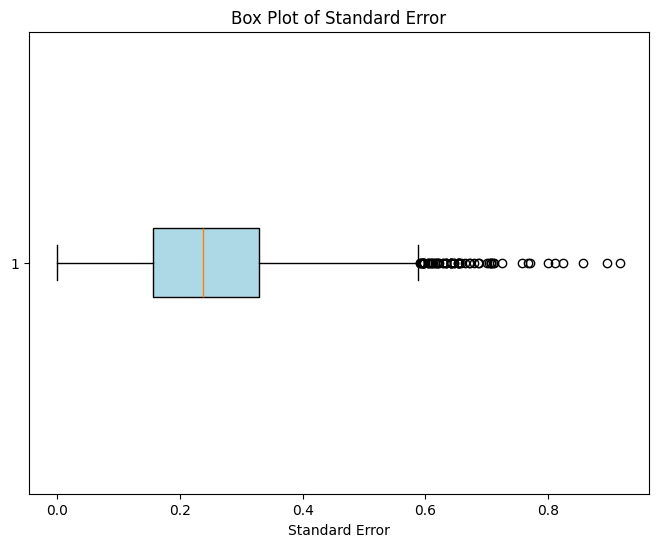

3299


In [ ]:
# temp_k.drop(['Weighted Importance', 'Is Analytical', ], axis=1, inplace=True)

# drop missing values to ensure the box plot works properly
standard_error_data = temp_k['Standard Error'].dropna()

# create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(standard_error_data, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Box Plot of Standard Error')
plt.xlabel('Standard Error')
plt.show()

print(len(standard_error_data))

### Classifying Job Titles into Categories

This code classifies job titles based on their alignment with predefined categories (e.g., STEM). It assigns scores to each job title based on relevant knowledge areas and normalizes the scores to ensure fairness across categories. Here's a breakdown:

1. **Category Sizes**:  
   - Calculates the number of knowledge areas for each category to use for normalization later.

2. **Initialize Scores**:  
   - Creates a dictionary (`category_scores`) to store scores for each job title and category.

3. **Assign Scores**:  
   - Iterates through the dataset and assigns scores (`Data Value`) to categories based on matching knowledge areas (`Element Name`) for each job title.

4. **Normalize Scores**:  
   - Divides the total score for each category by the number of knowledge areas in that category.  
   - Ensures that larger categories don’t unfairly dominate smaller ones.

5. **Determine Best Category**:  
   - For each job title, identifies the category with the highest normalized score as the "Best Category."

6. **Create Results DataFrame**:  
   - Stores the job title, best category, and (optionally) the full score breakdown for further analysis.

7. **Filter and Display**:  
   - Drops unnecessary columns (like detailed scores) for simplicity.  
   - Displays only job titles classified under the "STEM" category for review.

This process ensures job titles are classified fairly and accurately into their most relevant category.

```python
# Classify job titles
classified_jobs = classify_jobs_normalized(temp_k, categories)

# Drop unnecessary columns
classified_jobs.drop('Scores', axis=1, inplace=True)

# Display the classified jobs under the STEM category
classified_jobs[classified_jobs["Best Category"] == "STEM"]


In [ ]:
# Function to classify job titles
def classify_jobs_normalized(df, categories):
    # Calculate the number of knowledge areas per category
    category_sizes = {cat: len(knowledge_areas) for cat, knowledge_areas in categories.items()}

    # Initialize a dictionary to store scores
    category_scores = {title: {cat: 0 for cat in categories} for title in df["Title"].unique()}

    # Iterate through the dataset and assign data values to categories
    for _, row in df.iterrows():
        title = row["Title"]
        element = row["Element Name"]
        value = row["Data Value"]

        # Add the data value to the corresponding category
        for category, keywords in categories.items():
            if element in keywords:
                category_scores[title][category] += value

    # Normalize scores by the number of knowledge areas in each category
    for title, scores in category_scores.items():
        for category in scores:
            scores[category] /= category_sizes[category]

    # Determine the best category for each job title
    results = []
    for title, scores in category_scores.items():
        best_category = max(scores, key=scores.get)  # Get category with the highest score
        results.append({
            "Title": title,
            "Best Category": best_category,
            "Scores": scores  # Optional: Keep scores for further analysis
        })

    return pd.DataFrame(results)

# Classify job titles
classified_jobs = classify_jobs_normalized(temp_k, categories)

# Drop unnecessary columns
classified_jobs.drop('Scores', axis=1, inplace=True)

# Display the classified jobs
classified_jobs[classified_jobs["Best Category"] == "STEM"]

,Title,Best Category
2,Biofuels/Biodiesel Technology and Product Deve...,STEM
3,Water Resource Specialists,STEM
19,Database Architects,STEM
23,Software Quality Assurance Analysts and Testers,STEM
24,Geographic Information Systems Technologists a...,STEM
...,...,...
123,Medical and Clinical Laboratory Technicians,STEM
124,Medical Dosimetrists,STEM
146,"Electrical and Electronics Repairers, Powerhou...",STEM
160,Nuclear Power Reactor Operators,STEM


In [ ]:
categories_count = {
    "STEM": len(classified_jobs[classified_jobs["Best Category"] == "STEM"]),
    "Public Services": len(classified_jobs[classified_jobs["Best Category"] == "Public Services"]),
    "Industrial": len(classified_jobs[classified_jobs["Best Category"] == "Industrial"]),
    "Business": len(classified_jobs[classified_jobs["Best Category"] == "Business"]),
    "Social, Humanities, and Arts": len(classified_jobs[classified_jobs["Best Category"] == "Social, Humanities, and Arts"])
}

# create a DataFrame for Plotly
category_data = {
    "Category": list(categories_count.keys()),
    "Proportion": list(categories_count.values())
}

#  pie chart
fig = px.pie(
    category_data,
    values="Proportion",
    names="Category",
    title="Portion of Different Categories",
    hole=0.4
)

# add percentage display
fig.update_traces(textinfo='percent+label')

# Display pie chart
fig.show()

In [ ]:
work_context = pd.read_excel('/content/Work Context.xlsx')

In [ ]:
perform_eda(work_context)

=== DataFrame Shape ===
Rows: 291201, Columns: 16

=== DataFrame Columns ===
Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Category', 'Data Value', 'N', 'Standard Error',
       'Lower CI Bound', 'Upper CI Bound', 'Recommend Suppress',
       'Not Relevant', 'Date', 'Domain Source'],
      dtype='object')

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291201 entries, 0 to 291200
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   O*NET-SOC Code      291201 non-null  object 
 1   Title               291201 non-null  object 
 2   Element ID          291201 non-null  object 
 3   Element Name        291201 non-null  object 
 4   Scale ID            291201 non-null  object 
 5   Scale Name          291201 non-null  object 
 6   Category            241098 non-null  float64
 7   Data Value          291201 non-null  float64
 8   N

In [ ]:
analytical_work_context = pd.merge(work_context, classified_jobs, on="Title")

In [ ]:
automation = analytical_work_context[(analytical_work_context['Element Name'] == 'Degree of Automation') | (analytical_work_context['Element Name'] == 'Importance of Repeating Same Tasks')]

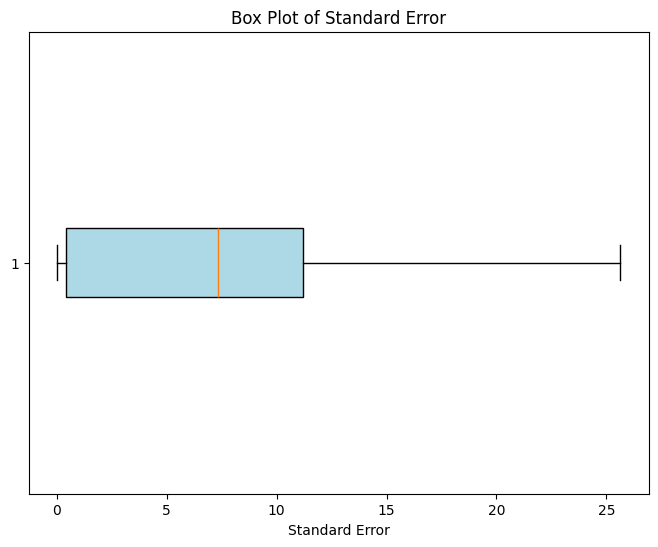

1200


In [ ]:
standard_error_data = automation['Standard Error'].dropna()

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(standard_error_data, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Box Plot of Standard Error')
plt.xlabel('Standard Error')
plt.show()

print(len(standard_error_data))

In [ ]:
automation

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Category,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,Best Category
288,11-3031.03,Investment Fund Managers,4.C.3.b.2,Degree of Automation,CX,Context,NaN,2.46,29.0,0.2465,1.9558,2.9657,N,NaN,07/2014,Incumbent,Business
289,11-3031.03,Investment Fund Managers,4.C.3.b.2,Degree of Automation,CXP,Context (Categories 1-5),1.0,32.51,29.0,10.7883,14.9636,56.8773,N,NaN,07/2014,Incumbent,Business
290,11-3031.03,Investment Fund Managers,4.C.3.b.2,Degree of Automation,CXP,Context (Categories 1-5),2.0,15.86,29.0,6.8406,6.1903,35.0105,N,NaN,07/2014,Incumbent,Business
291,11-3031.03,Investment Fund Managers,4.C.3.b.2,Degree of Automation,CXP,Context (Categories 1-5),3.0,24.66,29.0,7.8178,12.1471,43.6641,N,NaN,07/2014,Incumbent,Business
292,11-3031.03,Investment Fund Managers,4.C.3.b.2,Degree of Automation,CXP,Context (Categories 1-5),4.0,26.96,29.0,7.9956,13.8440,45.8875,N,NaN,07/2014,Incumbent,Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56641,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.C.3.b.7,Importance of Repeating Same Tasks,CXP,Context (Categories 1-5),1.0,1.24,32.0,1.3536,0.1304,10.7187,N,NaN,08/2019,Incumbent,Industrial
56642,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.C.3.b.7,Importance of Repeating Same Tasks,CXP,Context (Categories 1-5),2.0,3.03,32.0,3.1626,0.3450,21.9456,N,NaN,08/2019,Incumbent,Industrial
56643,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.C.3.b.7,Importance of Repeating Same Tasks,CXP,Context (Categories 1-5),3.0,7.78,32.0,4.9125,2.0435,25.4241,N,NaN,08/2019,Incumbent,Industrial
56644,53-7121.00,"Tank Car, Truck, and Ship Loaders",4.C.3.b.7,Importance of Repeating Same Tasks,CXP,Context (Categories 1-5),4.0,25.76,32.0,8.6777,12.0885,46.6774,N,NaN,08/2019,Incumbent,Industrial


In [ ]:
# Filter out rows based on "Scale Name", "Recommend Suppress", and "Not Relevant"

# Count and remove rows where "Recommend Suppress" is "Y"
print("Number of rows with Recommend Suppress as 'Y':", len(automation[automation["Recommend Suppress"] == "Y"]))
automation = automation[automation["Recommend Suppress"] != "Y"]

# Count and remove rows where "Not Relevant" is "Y"
print("Number of rows with Not Relevant as 'Y':", len(automation[automation["Not Relevant"] == "Y"]))
automation = automation[automation["Not Relevant"] != "Y"]

# Final DataFrame shape and null value summary
print("Final DataFrame shape:", automation.shape)
print("Null values in each column:\n", automation.isnull().sum())

Number of rows with Recommend Suppress as 'Y': 47
Number of rows with Not Relevant as 'Y': 0
Final DataFrame shape: (1965, 17)
Null values in each column:
 O*NET-SOC Code           0
Title                    0
Element ID               0
Element Name             0
Scale ID                 0
Scale Name               0
Category               352
Data Value               0
N                       20
Standard Error         812
Lower CI Bound         933
Upper CI Bound         933
Recommend Suppress     794
Not Relevant          1965
Date                     0
Domain Source            0
Best Category            0
dtype: int64


In [ ]:
idx = automation.groupby(['Title', 'Element Name'])['Data Value'].idxmax()

# use the indices to filter the original DataFrame, keeping all relevant columns
auto_grouped = automation.loc[idx].reset_index(drop=True)

auto_grouped

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Category,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,Best Category
0,15-2011.00,Actuaries,4.C.3.b.2,Degree of Automation,CXP,Context (Categories 1-5),3.0,37.04,27.0,NaN,NaN,NaN,NaN,NaN,08/2023,Occupational Expert,Business
1,15-2011.00,Actuaries,4.C.3.b.7,Importance of Repeating Same Tasks,CXP,Context (Categories 1-5),5.0,25.93,27.0,NaN,NaN,NaN,NaN,NaN,08/2023,Occupational Expert,Business
2,17-3021.00,Aerospace Engineering and Operations Technolog...,4.C.3.b.2,Degree of Automation,CXP,Context (Categories 1-5),2.0,47.93,17.0,16.0723,19.0300,78.2851,N,NaN,08/2019,Incumbent,Business
3,17-3021.00,Aerospace Engineering and Operations Technolog...,4.C.3.b.7,Importance of Repeating Same Tasks,CXP,Context (Categories 1-5),4.0,35.91,17.0,14.4193,12.9235,67.8911,N,NaN,08/2019,Incumbent,Business
4,17-2011.00,Aerospace Engineers,4.C.3.b.2,Degree of Automation,CXP,Context (Categories 1-5),1.0,48.95,27.0,4.3343,40.1632,57.7955,N,NaN,07/2015,Incumbent,STEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,11-9121.02,Water Resource Specialists,4.C.3.b.7,Importance of Repeating Same Tasks,CXP,Context (Categories 1-5),1.0,38.10,21.0,NaN,NaN,NaN,NaN,NaN,08/2020,Occupational Expert,STEM
348,17-2051.02,Water/Wastewater Engineers,4.C.3.b.2,Degree of Automation,CXP,Context (Categories 1-5),2.0,43.48,23.0,NaN,NaN,NaN,NaN,NaN,08/2020,Occupational Expert,Business
349,17-2051.02,Water/Wastewater Engineers,4.C.3.b.7,Importance of Repeating Same Tasks,CXP,Context (Categories 1-5),2.0,34.78,23.0,NaN,NaN,NaN,NaN,NaN,08/2020,Occupational Expert,Business
350,17-2199.10,Wind Energy Engineers,4.C.3.b.2,Degree of Automation,CXP,Context (Categories 1-5),1.0,43.48,37.0,8.6909,27.3000,61.1827,N,NaN,07/2012,Incumbent,STEM


In [ ]:
# filter the data for "Degree of Automation"
degree_auto = auto_grouped[auto_grouped['Element Name'] == 'Degree of Automation']

# cCount the number of jobs for each degree of automation
job_counts = degree_auto.groupby('Category').size().reset_index(name='Job Count')

# create the bar chart with different colors
fig = px.bar(
    job_counts,
    x='Job Count',  # Number of jobs
    y='Category',  # Degree of automation
    color='Category',  # Different colors for each bar
    orientation='h',  # Horizontal bar chart
    title="Number of Jobs by Degree of Automation",
    labels={'Job Count': 'Job Count', 'Category': 'Degree of Automation'},
    template='plotly_white',
    color_continuous_scale="Viridis"  # Use a color scale
)

# show the plot
fig.show()


In [ ]:
# filter the data for "Degree of Automation"
repeating_tasks = auto_grouped[auto_grouped['Element Name'] == 'Importance of Repeating Same Tasks']

# count the number of jobs for each degree of automation
repeating_job_counts = repeating_tasks.groupby('Category').size().reset_index(name='Job Count')

# create the bar chart with different colors
fig = px.bar(
    repeating_job_counts,
    x='Job Count',  # Number of jobs
    y='Category',  # Degree of automation
    color='Category',  # Different colors for each bar
    orientation='h',  # Horizontal bar chart
    title="Number of Jobs by Importance of Repeating Same Tasks",
    labels={'Job Count': 'Job Count', 'Category': 'Importance of Repeating Same Tasks'},
    template='plotly_white',
    color_continuous_scale="Viridis"  # Use a color scale
)

# show the plot
fig.show()

In [ ]:
skills = pd.read_excel('/content/Skills.xlsx')

In [ ]:
perform_eda(skills)

=== DataFrame Shape ===
Rows: 61530, Columns: 15

=== DataFrame Columns ===
Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Data Value', 'N', 'Standard Error', 'Lower CI Bound',
       'Upper CI Bound', 'Recommend Suppress', 'Not Relevant', 'Date',
       'Domain Source'],
      dtype='object')

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61530 entries, 0 to 61529
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   O*NET-SOC Code      61530 non-null  object 
 1   Title               61530 non-null  object 
 2   Element ID          61530 non-null  object 
 3   Element Name        61530 non-null  object 
 4   Scale ID            61530 non-null  object 
 5   Scale Name          61530 non-null  object 
 6   Data Value          61530 non-null  float64
 7   N                   61530 non-null  int64  
 8   Standard Error      61530 

In [ ]:
skills["Element Name"].unique()

array(['Reading Comprehension', 'Active Listening', 'Writing', 'Speaking',
       'Mathematics', 'Science', 'Critical Thinking', 'Active Learning',
       'Learning Strategies', 'Monitoring', 'Social Perceptiveness',
       'Coordination', 'Persuasion', 'Negotiation', 'Instructing',
       'Service Orientation', 'Complex Problem Solving',
       'Operations Analysis', 'Technology Design', 'Equipment Selection',
       'Installation', 'Programming', 'Operations Monitoring',
       'Operation and Control', 'Equipment Maintenance',
       'Troubleshooting', 'Repairing', 'Quality Control Analysis',
       'Judgment and Decision Making', 'Systems Analysis',
       'Systems Evaluation', 'Time Management',
       'Management of Financial Resources',
       'Management of Material Resources',
       'Management of Personnel Resources'], dtype=object)

In [ ]:
analytical_skills = pd.merge(skills, classified_jobs, on="Title")

In [ ]:
# filter out rows based on "Scale Name", "Recommend Suppress", and "Not Relevant"

# count and remove rows where "Scale Name" is "Level"
print("Number of rows with Level as Scale Name:", len(analytical_skills[analytical_skills["Scale Name"] == "Level"]))
analytical_skills_importance = analytical_skills[analytical_skills["Scale Name"] != "Level"]

# count and remove rows where "Recommend Suppress" is "Y"
print("Number of rows with Recommend Suppress as 'Y':", len(analytical_skills[analytical_skills["Recommend Suppress"] == "Y"]))
analytical_skills_importance = analytical_skills[analytical_skills["Recommend Suppress"] != "Y"]

# count and remove rows where "Not Relevant" is "Y"
print("Number of rows with Not Relevant as 'Y':", len(analytical_skills[analytical_skills["Not Relevant"] == "Y"]))
analytical_skills_importance = analytical_skills[analytical_skills["Not Relevant"] != "Y"]

# final DataFrame shape and null value summary
print("Final DataFrame shape:", analytical_skills_importance.shape)
print("Null values in each column:\n", analytical_skills_importance.isnull().sum())

Number of rows with Level as Scale Name: 6160
Number of rows with Recommend Suppress as 'Y': 57
Number of rows with Not Relevant as 'Y': 571
Final DataFrame shape: (11749, 16)
Null values in each column:
 O*NET-SOC Code           0
Title                    0
Element ID               0
Element Name             0
Scale ID                 0
Scale Name               0
Data Value               0
N                        0
Standard Error           0
Lower CI Bound           0
Upper CI Bound           0
Recommend Suppress       0
Not Relevant          6160
Date                     0
Domain Source            0
Best Category            0
dtype: int64


In [ ]:
analytical_skills_importance

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,Best Category
0,11-3031.03,Investment Fund Managers,2.A.1.a,Reading Comprehension,IM,Importance,4.00,8,0.2673,3.4762,4.5238,N,NaN,07/2014,Analyst,Business
1,11-3031.03,Investment Fund Managers,2.A.1.a,Reading Comprehension,LV,Level,4.25,8,0.1637,3.9292,4.5708,N,N,07/2014,Analyst,Business
2,11-3031.03,Investment Fund Managers,2.A.1.b,Active Listening,IM,Importance,4.00,8,0.1890,3.6296,4.3704,N,NaN,07/2014,Analyst,Business
3,11-3031.03,Investment Fund Managers,2.A.1.b,Active Listening,LV,Level,4.12,8,0.1250,3.8800,4.3700,N,N,07/2014,Analyst,Business
4,11-3031.03,Investment Fund Managers,2.A.1.c,Writing,IM,Importance,3.62,8,0.3239,2.9902,4.2598,N,NaN,07/2014,Analyst,Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12315,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.b,Management of Financial Resources,LV,Level,1.12,8,0.1250,0.8800,1.3700,N,N,08/2019,Analyst,Industrial
12316,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.c,Management of Material Resources,IM,Importance,2.00,8,0.0000,2.0000,2.0000,N,NaN,08/2019,Analyst,Industrial
12317,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.c,Management of Material Resources,LV,Level,1.88,8,0.1250,1.6300,2.1200,N,N,08/2019,Analyst,Industrial
12318,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.d,Management of Personnel Resources,IM,Importance,2.88,8,0.1250,2.6300,3.1200,N,NaN,08/2019,Analyst,Industrial


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# calculate the average 'Data Value' for each combination of 'Best Category' and 'Element Name'
average_values = analytical_skills_importance.groupby(['Best Category', 'Element Name'], as_index=False)['Data Value'].mean()

# rank and filter the top 10 for each category
top_10_per_category = (
    average_values.groupby('Best Category', group_keys=False)
    .apply(lambda x: x.nlargest(10, 'Data Value'))
)

categories = top_10_per_category['Best Category'].unique()

# create a subplot layout with one row per category
fig = make_subplots(
    rows=len(categories),
    cols=1,
    subplot_titles=[f"Top 10 Skills for {category}" for category in categories],
    specs=[[{'type': 'sunburst'}] for _ in categories]
)

# add each sunburst chart to the subplot
for i, category in enumerate(categories):
    filtered_data = top_10_per_category[top_10_per_category['Best Category'] == category]

    # create sunburst chart for this category
    sunburst = go.Sunburst(
        labels=filtered_data['Element Name'],
        parents=filtered_data['Best Category'],
        values=filtered_data['Data Value'],
        marker=dict(colorscale="Plasma")
    )

    # add to subplot
    fig.add_trace(sunburst, row=i+1, col=1)

# update layout
fig.update_layout(
    title="Top 10 Skills Across Categories",
    height=800 * len(categories),
    width=1000,
    showlegend=False
)

fig.show()


<ipython-input-137-4d65b33da186>:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
# calculate the average 'Data Value' for each skill
top_analytical_skills = analytical_skills_importance.groupby(['Element Name'], as_index=False)['Data Value'].mean()

# sort by 'Data Value' and select the top 10 skills
top_analytical_skills = top_analytical_skills.sort_values(by='Data Value', ascending=False).head(10)

# create a bar chart for the top 10 analytical skills
fig = px.bar(
    top_analytical_skills,
    x='Element Name',
    y='Data Value',
    color='Element Name',
    title="Top 10 Analytical Skills by Average Importance",
    labels={'Element Name': 'Skill', 'Data Value': 'Average Importance'},
    template="plotly_white"
)

# update layout for better readability
fig.update_layout(
    xaxis_tickangle=-45,
    showlegend=False,
    height=600,
    width=800
)

fig.show()


In [ ]:
# calculate the average 'Data Value' for each skill
analytical_skills_level = analytical_skills[analytical_skills["Scale Name"] == "Level"]

top_analytical_skills_by_level = analytical_skills_level.groupby(['Element Name'], as_index=False)['Data Value'].mean()

# sort by 'Data Value' and select the top 10 skills
top_analytical_skills_by_level = top_analytical_skills_by_level.sort_values(by='Data Value', ascending=False).head(10)

# bar chart for the top 10 analytical skills
fig = px.bar(
    top_analytical_skills_by_level,
    x='Element Name',  # Skills on the x-axis
    y='Data Value',    # Average importance values on the y-axis
    color='Element Name',  # Different colors for each bar
    title="Top 10 Analytical Skills by Average Level",
    labels={'Element Name': 'Skill', 'Data Value': 'Average Level'},
    template="plotly_white"
)

# ppdate layout for better readability
fig.update_layout(
    xaxis_tickangle=-45,  # Rotate x-axis labels for readability
    showlegend=False,     # Hide legend (optional)
    height=600,           # Adjust chart height
    width=800             # Adjust chart width
)

fig.show()

In [ ]:
analytical_skills_level["Data Value"].describe()

,Data Value
count,6160.000000
mean,2.639705
std,1.289546
min,0.000000
25%,1.880000
50%,3.000000
75%,3.620000
max,6.000000


In [ ]:
ete = pd.read_excel('/content/Education, Training, and Experience.xlsx')

In [ ]:
perform_eda(ete)

=== DataFrame Shape ===
Rows: 36209, Columns: 15

=== DataFrame Columns ===
Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Category', 'Data Value', 'N', 'Standard Error',
       'Lower CI Bound', 'Upper CI Bound', 'Recommend Suppress', 'Date',
       'Domain Source'],
      dtype='object')

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36209 entries, 0 to 36208
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   O*NET-SOC Code      36209 non-null  object 
 1   Title               36209 non-null  object 
 2   Element ID          36209 non-null  object 
 3   Element Name        36209 non-null  object 
 4   Scale ID            36209 non-null  object 
 5   Scale Name          36209 non-null  object 
 6   Category            35178 non-null  float64
 7   Data Value          36209 non-null  float64
 8   N                   36209 non-

In [ ]:
ete_for_analytics = pd.merge(ete, classified_jobs, on="Title")

In [ ]:
ete_for_analytics["Element Name"].unique()

array(['Required Level of Education', 'Related Work Experience',
       'On-Site or In-Plant Training', 'On-the-Job Training',
       'Job-Related Professional Certification', 'Apprenticeship'],
      dtype=object)

In [ ]:
ete_for_analytics = ete_for_analytics[~ete_for_analytics["Element Name"].isin(['Related Work Experience', 'On-Site or In-Plant Training', 'On-the-Job Training'])]

In [ ]:

# filter rows where "Element Name" is "Required Level of Education" and "Data Value" > 0.0
filtered_df = ete_for_analytics[
    (ete_for_analytics['Element Name'] == 'Required Level of Education') &
    (ete_for_analytics['Data Value'] > 0.0)
]

# group by "Title" and obtain the top 3 "Data Value" entries for each job
top_3_per_job = (
    filtered_df
    .sort_values(by=['Title', 'Data Value'], ascending=[True, False])  # Sort by Title and Data Value
    .groupby('Title')
    .head(3)  # Keep top 3 rows per group
    .reset_index(drop=True)
)

# keep relevant columns (e.g., "Category" alongside other relevant information)
result = top_3_per_job[['Title', 'Data Value', 'Category', 'Best Category']]

# display the result
result


,Title,Data Value,Category,Best Category
0,Actuaries,78.57,6.0,Business
1,Actuaries,10.71,7.0,Business
2,Actuaries,10.71,10.0,Business
3,Aerospace Engineering and Operations Technolog...,39.23,3.0,Business
4,Aerospace Engineering and Operations Technolog...,33.16,5.0,Business
...,...,...,...,...
479,Water/Wastewater Engineers,26.09,8.0,Business
480,Water/Wastewater Engineers,4.35,10.0,Business
481,Wind Energy Engineers,69.64,6.0,STEM
482,Wind Energy Engineers,13.92,8.0,STEM


In [ ]:
ete_categories = pd.read_excel('/content/Education, Training, and Experience Categorie.xlsx')
ete_categories

,Element ID,Element Name,Scale ID,Scale Name,Category,Category Description
0,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),1,Less than a High School Diploma
1,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),2,High School Diploma - or the equivalent (for e...
2,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),3,Post-Secondary Certificate - awarded for train...
3,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),4,Some College Courses
4,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),5,Associate's Degree (or other 2-year degree)
5,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),6,Bachelor's Degree
6,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),7,Post-Baccalaureate Certificate - awarded for c...
7,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),8,Master's Degree
8,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),9,Post-Master's Certificate - awarded for comple...
9,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),10,First Professional Degree - awarded for comple...


In [ ]:
result = pd.merge(result, ete_categories, on='Category', how='left')

In [ ]:
result = result[result['Scale ID'] == 'RL']
result.drop(['Scale Name', 'Element ID'], axis=1, inplace=True)
result

,Title,Data Value,Category,Best Category,Element Name,Scale ID,Category Description
0,Actuaries,78.57,6.0,Business,Required Level of Education,RL,Bachelor's Degree
4,Actuaries,10.71,7.0,Business,Required Level of Education,RL,Post-Baccalaureate Certificate - awarded for c...
8,Actuaries,10.71,10.0,Business,Required Level of Education,RL,First Professional Degree - awarded for comple...
10,Aerospace Engineering and Operations Technolog...,39.23,3.0,Business,Required Level of Education,RL,Post-Secondary Certificate - awarded for train...
14,Aerospace Engineering and Operations Technolog...,33.16,5.0,Business,Required Level of Education,RL,Associate's Degree (or other 2-year degree)
...,...,...,...,...,...,...,...
1770,Water/Wastewater Engineers,26.09,8.0,Business,Required Level of Education,RL,Master's Degree
1774,Water/Wastewater Engineers,4.35,10.0,Business,Required Level of Education,RL,First Professional Degree - awarded for comple...
1776,Wind Energy Engineers,69.64,6.0,STEM,Required Level of Education,RL,Bachelor's Degree
1780,Wind Energy Engineers,13.92,8.0,STEM,Required Level of Education,RL,Master's Degree


In [ ]:
# filter for STEM roles
stem_roles = result[result['Best Category'] == 'STEM']

# create a unique list of nodes
nodes = list(stem_roles['Best Category'].unique()) + \
        list(stem_roles['Category Description'].unique()) + \
        list(stem_roles['Title'].unique())

# map each node to an index
node_indices = {node: i for i, node in enumerate(nodes)}

# define the source and target indices for the Sankey links
# Best Category -> Category Description
stem_roles['Source_BestCategory'] = stem_roles['Best Category'].map(node_indices)
stem_roles['Target_CategoryDescription'] = stem_roles['Category Description'].map(node_indices)

# Category Description -> Title
stem_roles['Source_CategoryDescription'] = stem_roles['Category Description'].map(node_indices)
stem_roles['Target_Title'] = stem_roles['Title'].map(node_indices)

# combine the links
source = list(stem_roles['Source_BestCategory']) + list(stem_roles['Source_CategoryDescription'])
target = list(stem_roles['Target_CategoryDescription']) + list(stem_roles['Target_Title'])
value = list(stem_roles['Data Value']) + list(stem_roles['Data Value'])  # Double for both levels

# Step 5: Create the Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        # List of source indices
        source=source,
        # List of target indices
        target=target,
        # List of flow values
        value=value
    )
))

fig.update_layout(title_text="Sankey Diagram: STEM → Education Level → Job Title", font_size=10)
fig.show()

<ipython-input-256-dd40fef4a6eb>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-256-dd40fef4a6eb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-256-dd40fef4a6eb>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-256-

In [ ]:
# calculate the frequency of each Category Description
category_counts = result['Category Description'].value_counts().reset_index()
category_counts.columns = ['Category Description', 'Frequency']

# create the donut chart
fig = px.pie(
    category_counts,
    names='Category Description',
    values='Frequency',
    title="Frequency of Category Descriptions",
    hole=0.5,  # Creates the donut effect
    template='plotly_white'
)

# set custom height and width for the chart
fig.update_layout(
    height=2500,  # Set chart height (increase for larger visuals)
    width=2500,   # Set chart width
    title={
        'text': "Frequency of Category Descriptions",
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Display the chart
fig.show()